In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../data/top_200_features.csv")

In [4]:
df.head()

,Unnamed: 0,Artist,Position,Streams,Track Name,acousticness,analysis_url,danceability,date,duration_ms,...,loudness,mode,region,speechiness,tempo,time_signature,track_href,type,uri,valence
0,0,Ed Sheeran,1,51095759,Shape of You,0.5810,https://api.spotify.com/v1/audio-analysis/7qiZ...,0.825,2017-01-06--2017-01-13,233713.0,...,-3.183,0.0,global,0.0802,95.977,4.0,https://api.spotify.com/v1/tracks/7qiZfU4dY1lW...,audio_features,spotify:track:7qiZfU4dY1lWllzX7mPBI3,0.9310
1,1,Ed Sheeran,2,35168298,Castle on the Hill,0.0232,https://api.spotify.com/v1/audio-analysis/6PCU...,0.461,2017-01-06--2017-01-13,261154.0,...,-4.868,1.0,global,0.0989,135.007,4.0,https://api.spotify.com/v1/tracks/6PCUP3dWmTjc...,audio_features,spotify:track:6PCUP3dWmTjcTtXY02oFdT,0.4710
2,2,The Weeknd,3,24261229,Starboy,0.1650,https://api.spotify.com/v1/audio-analysis/5aAx...,0.681,2017-01-06--2017-01-13,230453.0,...,-7.028,1.0,global,0.2820,186.054,4.0,https://api.spotify.com/v1/tracks/5aAx2yezTd8z...,audio_features,spotify:track:5aAx2yezTd8zXrkmtKl66Z,0.5350
3,3,Clean Bandit,4,21671209,Rockabye (feat. Sean Paul & Anne-Marie),0.4060,https://api.spotify.com/v1/audio-analysis/5knu...,0.720,2017-01-06--2017-01-13,251088.0,...,-4.068,0.0,global,0.0523,101.965,4.0,https://api.spotify.com/v1/tracks/5knuzwU65gJK...,audio_features,spotify:track:5knuzwU65gJK7IF5yJsuaW,0.7420
4,4,ZAYN,5,21513043,I Don’t Wanna Live Forever (Fifty Shades Darke...,0.0631,https://api.spotify.com/v1/audio-analysis/3NdD...,0.735,2017-01-06--2017-01-13,245200.0,...,-8.374,1.0,global,0.0585,117.973,4.0,https://api.spotify.com/v1/tracks/3NdDpSvN911V...,audio_features,spotify:track:3NdDpSvN911VPGivFlV5d0,0.0862


In [5]:
s = df["danceability"].isna()
indices = s[s == True].index.values.tolist()
for i in indices:
    print(df.iloc[i])
df = df.drop(index=indices)
df = df.reset_index()

Unnamed: 0                4000
Artist                  Artist
Position              Position
Streams                Streams
Track Name          Track Name
acousticness               NaN
analysis_url               NaN
danceability               NaN
date                      date
duration_ms                NaN
energy                     NaN
id_caller                   id
id_other                   NaN
instrumentalness           NaN
key                        NaN
liveness                   NaN
loudness                   NaN
mode                       NaN
region                  region
speechiness                NaN
tempo                      NaN
time_signature             NaN
track_href                 NaN
type                       NaN
uri                        NaN
valence                    NaN
Name: 4000, dtype: object
Unnamed: 0                           11837
Artist                             Wolfine
Position                                37
Streams                           10694

In [6]:
df["danceability"].isna().sum()

0

In [7]:
df.columns

Index(['index', 'Unnamed: 0', 'Artist', 'Position', 'Streams', 'Track Name',
       'acousticness', 'analysis_url', 'danceability', 'date', 'duration_ms',
       'energy', 'id_caller', 'id_other', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'region', 'speechiness', 'tempo',
       'time_signature', 'track_href', 'type', 'uri', 'valence'],
      dtype='object')

In [8]:
features = df.select_dtypes(include=["float64"])

In [9]:
corrdf = features.copy()
corrdf["Position"] = df["Position"].astype(int)
corrdf["Streams"] = df["Streams"].astype(float)
print(corrdf.corr(method="pearson")["Position"])
print(corrdf.corr(method="pearson")["Streams"])

acousticness        0.019345
danceability       -0.069364
duration_ms         0.059766
energy             -0.015129
instrumentalness   -0.004930
key                 0.005817
liveness            0.033658
loudness           -0.060602
mode                0.053481
speechiness        -0.003150
tempo               0.035512
time_signature     -0.003144
valence            -0.029650
Position            1.000000
Streams            -0.763189
Name: Position, dtype: float64
acousticness       -0.001165
danceability        0.055517
duration_ms        -0.045896
energy             -0.021367
instrumentalness    0.002471
key                -0.005954
liveness           -0.027671
loudness            0.029639
mode               -0.035721
speechiness        -0.000774
tempo              -0.033978
time_signature      0.010477
valence             0.022731
Position           -0.763189
Streams             1.000000
Name: Streams, dtype: float64


Better position gives more streams!

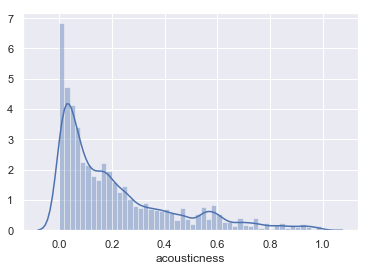

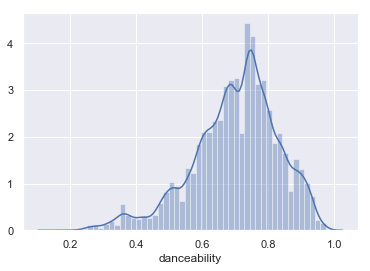

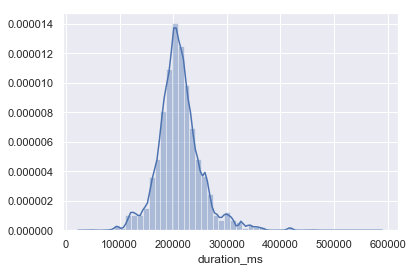

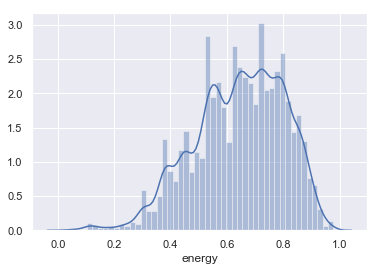

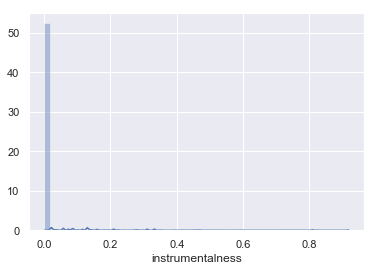

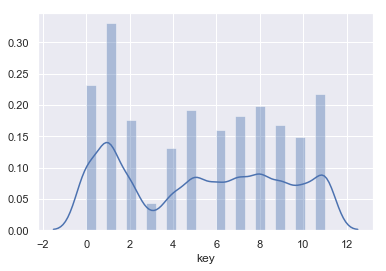

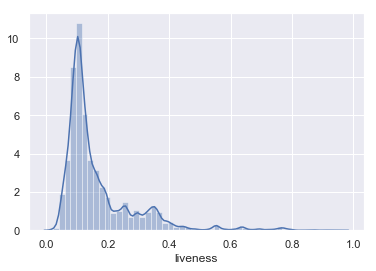

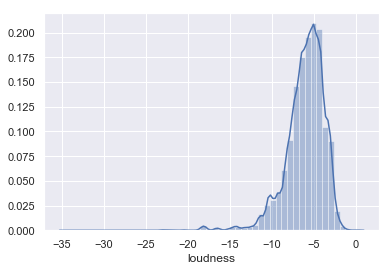

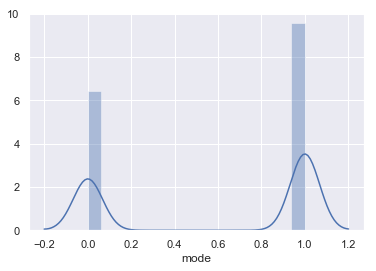

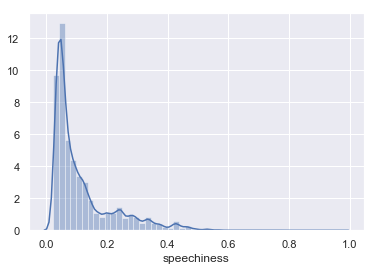

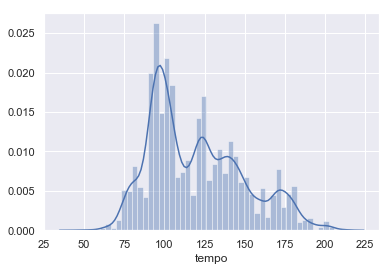

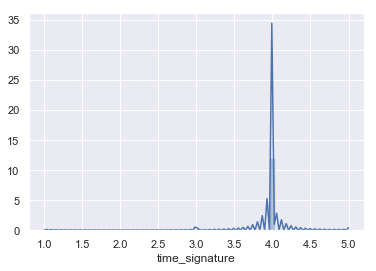

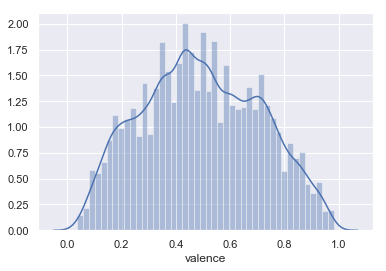

In [10]:
sns.set()
for feature in features.columns:
    sns.distplot(df[feature])
    plt.show()

In [11]:
df["instrumentalness"].describe()

count    27800.000000
mean         0.006624
std          0.046147
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000015
max          0.918000
Name: instrumentalness, dtype: float64

In [12]:
dates = []
for i in range(0, df.shape[0], 200):
    dates.append(df["date"][i][:10])

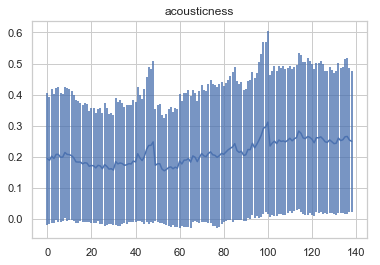

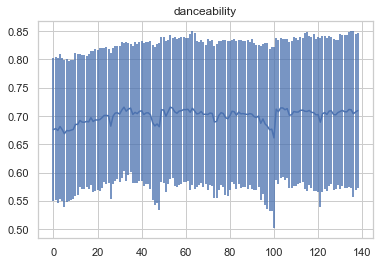

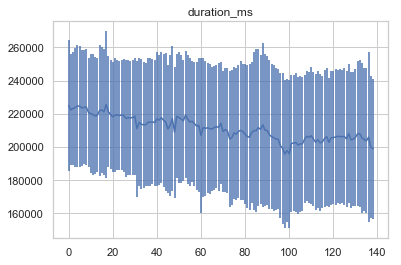

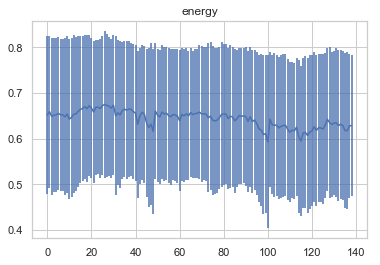

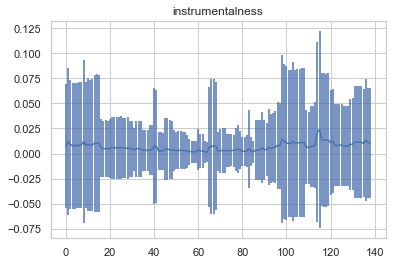

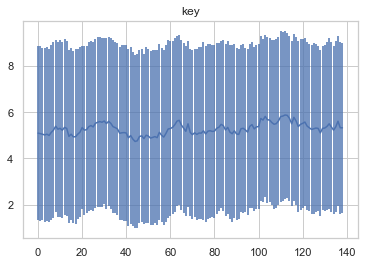

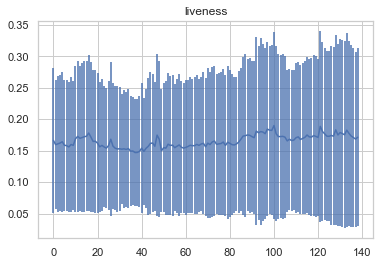

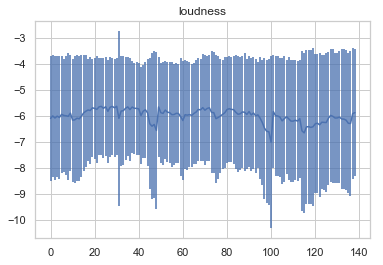

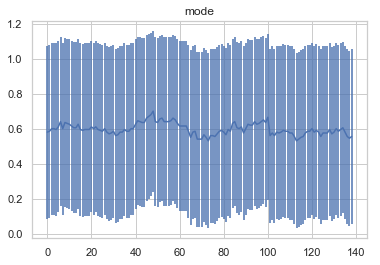

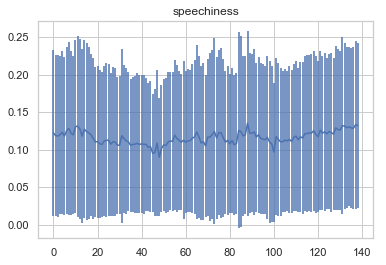

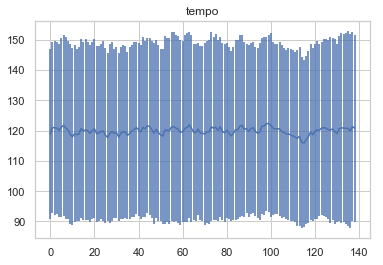

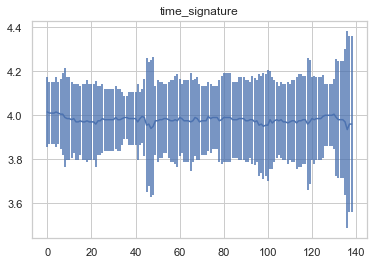

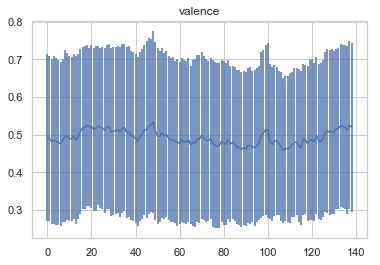

In [13]:
sns.set_style("whitegrid")
feature_mean = pd.DataFrame(columns=features.columns, index=pd.to_datetime(dates))
for feature in features.columns:
    average = []
    std = []
    for i in range(0, df.shape[0], 200):
        average.append(df[feature][i:i+200].mean())
        std.append(df[feature][i:i+200].std())
    feature_mean[feature] = average
    plt.errorbar(x=np.arange(len(average)), y=average, yerr=std, c="b")
    plt.title(feature)
    plt.show()

In [14]:
feature_mean.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
2017-01-06,0.193863,0.676170,224969.750,0.651704,0.007173,5.095,0.166152,-6.108545,0.580,0.122162,118.885135,4.015,0.491804
2017-01-13,0.188506,0.678070,222369.595,0.659144,0.011800,5.075,0.159478,-6.011535,0.585,0.118482,121.007170,4.010,0.489789
2017-01-20,0.201954,0.674755,223224.455,0.648524,0.009049,5.050,0.160663,-6.093700,0.600,0.117990,120.890135,4.010,0.481608
2017-01-27,0.194442,0.681720,223771.285,0.651434,0.007873,5.015,0.162028,-6.021405,0.600,0.119633,120.809115,4.010,0.485549
2017-02-03,0.207496,0.676025,224696.305,0.652214,0.007852,5.050,0.164080,-6.073245,0.595,0.123012,120.042640,4.015,0.482391


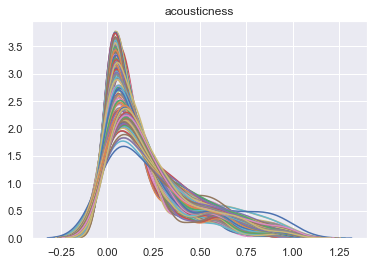

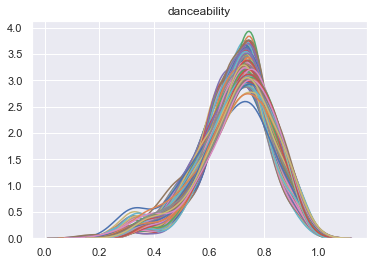

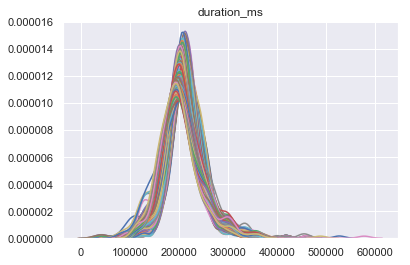

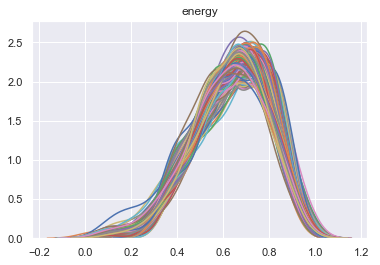

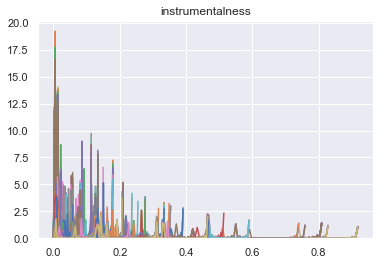

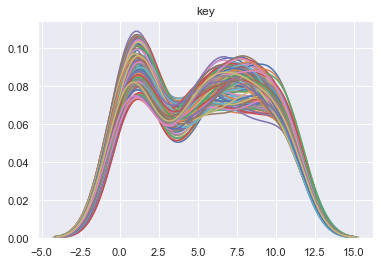

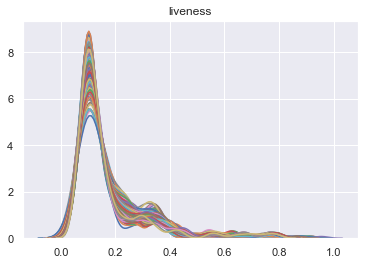

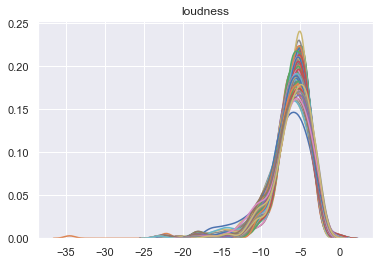

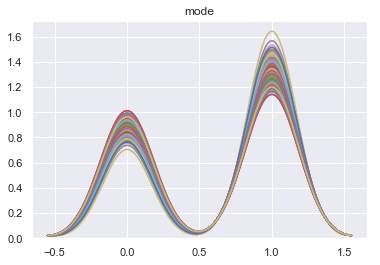

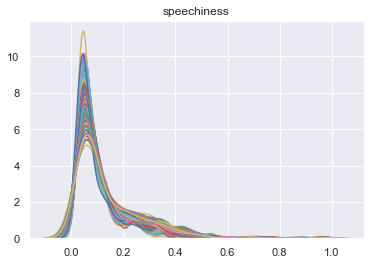

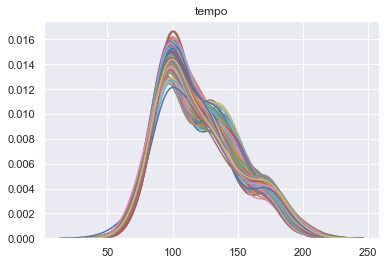

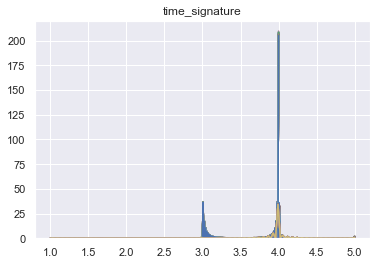

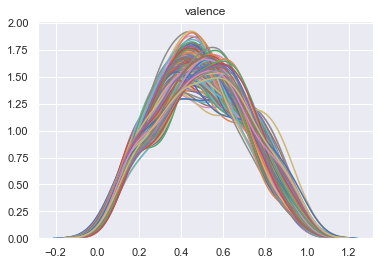

In [15]:
sns.set()
for feature in features.columns:
    for i in range(0, df.shape[0], 200):
        sns.kdeplot(df[feature][i:i+200], legend=False).set_title(feature)
    plt.show()

In [128]:
important = ["loudness", "speechiness", "liveness", "danceability"]
sns.set_context("poster")
j = 0
for i in range(0, df.shape[0], 200):
    fig, axes = plt.subplots(2, 2, figsize=(15, 15))
    axes[0, 0].set_yticks([])
    axes[0, 0].set_xlim(-40, 10)
    axes[0, 0].set_ylim(0, 0.25)
    axes[0, 1].set_yticks([])
    axes[0, 1].set_xlim(-0.2, 1.2)
    axes[0, 1].set_ylim(0, 12)
    axes[1, 0].set_yticks([])
    axes[1, 0].set_xlim(-0.2, 1.2)
    axes[1, 0].set_ylim(0, 9.5)
    axes[1, 1].set_yticks([])
    axes[1, 1].set_xlim(0, 1.25)
    axes[1, 1].set_ylim(0, 4.5)
    while j <= i:
        if j < i:
            a = 0.01
        else: 
            a = 1
            date = df["date"][i]
            axes[1, 1].annotate(date,
                            xy=(0.33, 0.97), xycoords='figure fraction',
                            verticalalignment='top', fontsize=35)
        sns.kdeplot(df[important[0]][j:j+200], legend=False, ax=axes[0, 0], alpha=a, color="r").set_title(important[0])
        sns.kdeplot(df[important[1]][j:j+200], legend=False, ax=axes[0, 1], alpha=a, color="r").set_title(important[1])
        sns.kdeplot(df[important[2]][j:j+200], legend=False, ax=axes[1, 0], alpha=a, color="r").set_title(important[2])
        sns.kdeplot(df[important[3]][j:j+200], legend=False, ax=axes[1, 1], alpha=a, color="r").set_title(important[3])
        j += 200
    plt.savefig(f"./test/{date}.jpg")
    plt.clf()
    j = 0

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

Backwards fill a few missing weeks:

In [68]:
feature_mean = feature_mean.asfreq(freq="W", method='bfill')

## Forecasting using Autoregressive Integrated Moving Average (ARIMA)

In [132]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pyplot import figure
import pmdarima as pm
register_matplotlib_converters()

In [133]:
def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color="blue", label="Original")
    mean = plt.plot(rolling_mean, color="red", label="Rolling Mean")
    std = plt.plot(rolling_std, color="black", label="Rolling Std")
    plt.legend(loc="best")
    plt.title("Rolling Mean & Standard Deviation")
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries)
    print("ADF Statistic: {}".format(result[0]))
    print("p-value: {}".format(result[1]))
    print("Critical Values:")
    for key, value in result[4].items():
        print("\t{}: {}".format(key, value))

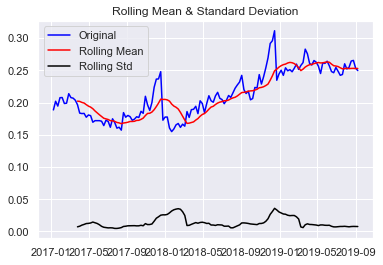

ADF Statistic: -1.6933708823838458
p-value: 0.43453119367672244
Critical Values:
	1%: -3.47864788917503
	5%: -2.882721765644168
	10%: -2.578065326612056


In [21]:
timeseries = feature_mean["acousticness"]
get_stationarity(timeseries)

ADF Statistic is far from the critical values and the p-value is greater than the threshold (0.05). Thus, we can conclude that the time series is not stationary

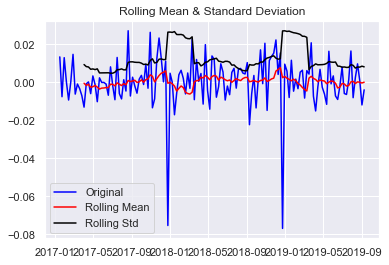

ADF Statistic: -14.05980169630659
p-value: 3.070906138004311e-26
Critical Values:
	1%: -3.47864788917503
	5%: -2.882721765644168
	10%: -2.578065326612056


In [22]:
timeseries_shift = timeseries.diff()
timeseries_shift.dropna(inplace=True)
get_stationarity(timeseries_shift)

The null hypothesis of the ADF test is that the time series is non-stationary. So, if the p-value of the test is less than the significance level (0.05) then you reject the null hypothesis and infer that the time series is indeed stationary. The value for p is less than signifacnce level after differcing once, so d = 1.

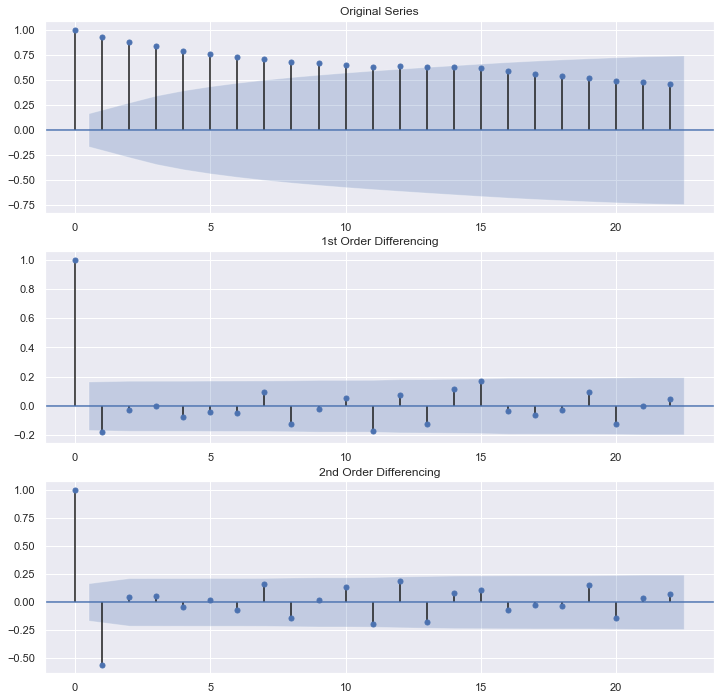

In [23]:
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(311)
fig = plot_acf(timeseries, ax=ax1, title="Original Series") 
ax2 = fig.add_subplot(312)
fig = plot_acf(timeseries_shift, ax=ax2, title="1st Order Differencing")
ax3 = fig.add_subplot(313)
fig = plot_acf(timeseries_shift.diff().dropna(), ax=ax3, title="2nd Order Differencing")

It might be slightly over differenced already at one. If your series is slightly under differenced, adding one or more additional AR terms usually makes it up. Likewise, if it is slightly over-differenced, try adding an additional MA term.

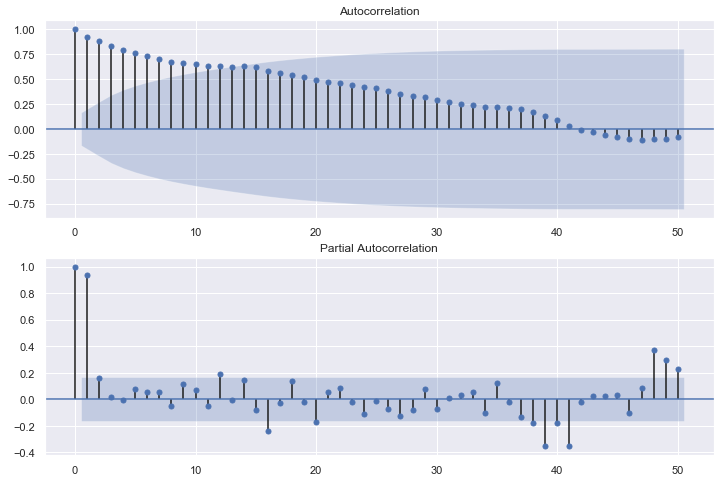

In [24]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(timeseries, lags=50, ax=ax1) 
ax2 = fig.add_subplot(212)
fig = plot_pacf(timeseries, lags=50, ax=ax2)

Any autocorrelation in a stationarized series can be rectified by adding enough AR terms. So, we initially take the order of AR term to be equal to as many lags that crosses the significance limit in the PACF plot. Lag 2 is above the signicance line so p = 2

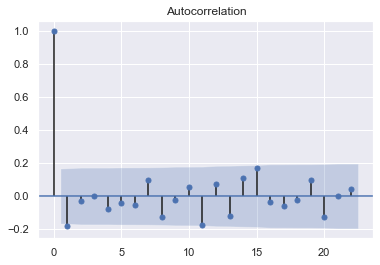

In [25]:
plot_acf(timeseries_shift)
plt.show()

The ACF tells how many MA terms are required to remove any autocorrelation in the stationarized series. So q = 1.

                             ARIMA Model Results                              
Dep. Variable:         D.acousticness   No. Observations:                  139
Model:                 ARIMA(2, 1, 1)   Log Likelihood                 405.523
Method:                       css-mle   S.D. of innovations              0.013
Date:                Tue, 01 Oct 2019   AIC                           -801.046
Time:                        08:50:59   BIC                           -786.373
Sample:                    01-15-2017   HQIC                          -795.083
                         - 09-08-2019                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0004      0.001      0.474      0.636      -0.001       0.002
ar.L1.D.acousticness    -0.8706      0.433     -2.011      0.046      -1.719      -0.022
ar.L2.D.acou

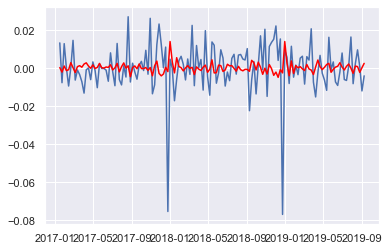

In [26]:
model = ARIMA(timeseries, order=(2,1,1))
results = model.fit(disp=-1)
print(results.summary())
plt.plot(timeseries_shift)
plt.plot(results.fittedvalues, color="red")

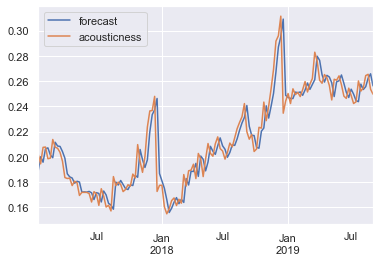

In [27]:
graph = results.plot_predict()
plt.show()

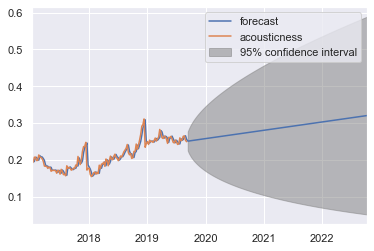

In [28]:
graph = results.plot_predict(1,300)
plt.show()

Now let's use a model that can automatically find the best parameters:

In [29]:
automodel = pm.auto_arima(timeseries, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(automodel.summary())

Fit ARIMA: order=(1, 1, 1); AIC=-806.848, BIC=-795.110, Fit time=0.163 seconds
Fit ARIMA: order=(0, 1, 0); AIC=-801.692, BIC=-795.823, Fit time=0.009 seconds
Fit ARIMA: order=(1, 1, 0); AIC=-804.359, BIC=-795.555, Fit time=0.036 seconds
Fit ARIMA: order=(0, 1, 1); AIC=-804.923, BIC=-796.119, Fit time=0.061 seconds
Fit ARIMA: order=(2, 1, 1); AIC=-801.046, BIC=-786.373, Fit time=0.228 seconds
Fit ARIMA: order=(1, 1, 2); AIC=-801.290, BIC=-786.617, Fit time=0.240 seconds
Fit ARIMA: order=(2, 1, 2); AIC=-804.826, BIC=-787.219, Fit time=0.500 seconds
Total fit time: 1.247 seconds
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  139
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 407.424
Method:                       css-mle   S.D. of innovations              0.013
Date:                Tue, 01 Oct 2019   AIC                           -806.848
Time:                 

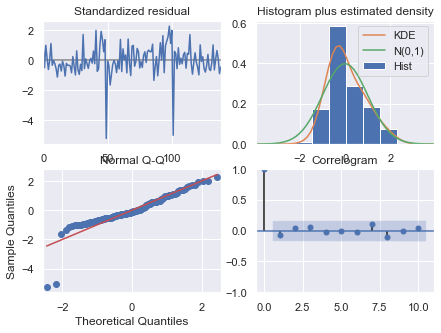

In [30]:
graph = automodel.plot_diagnostics(figsize=(7,5))
plt.show()

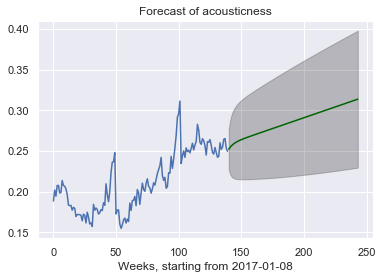

In [31]:
# Forecast
n_periods = 104
fc, confint = automodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(timeseries), len(timeseries)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(timeseries.tolist())
plt.plot(fc_series, color='darkgreen')
plt.xlabel(f"Weeks, starting from {str(timeseries.index[0])[:10]}")
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.25)

plt.title(f"Forecast of {timeseries.name}")
plt.show()

Auto arima as a function, also a plotting function:

In [136]:
def arimamodel(timeseries):
    automodel = pm.auto_arima(timeseries, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
    return automodel

In [216]:
def plotarima(n_periods, timeseries, automodel):
    # Forecast
    fc, confint = automodel.predict(n_periods=n_periods, return_conf_int=True)
    index_of_fc = pd.date_range(timeseries.index[timeseries.shape[0]-1], periods=n_periods, freq="W")
    #index_of_fc = np.arange(len(timeseries), len(timeseries)+n_periods)

    # make series for plotting purpose
    fc_series = pd.Series(fc, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)
    
    
    # Plot
    plt.figure(num=None, figsize=(15, 15), dpi=300, facecolor='w', edgecolor='k')
    plt.plot(timeseries)
    plt.plot(fc_series, color="red")
    plt.xlabel(f"Date")
    plt.fill_between(lower_series.index, 
                     lower_series, 
                     upper_series, 
                     color="k", alpha=.25)
    plt.legend(("Known Data", "Forecast", "95% Confidence"), loc="upper left")

    plt.title(timeseries.name, fontdict = {'fontsize' : 30})
    #plt.show()
    plt.savefig(f"./images/{timeseries.name}.png")

Fit ARIMA: order=(1, 1, 1); AIC=-96.616, BIC=-84.878, Fit time=0.213 seconds
Fit ARIMA: order=(0, 1, 0); AIC=-80.264, BIC=-74.395, Fit time=0.008 seconds
Fit ARIMA: order=(1, 1, 0); AIC=-90.077, BIC=-81.274, Fit time=0.018 seconds
Fit ARIMA: order=(0, 1, 1); AIC=-91.364, BIC=-82.561, Fit time=0.021 seconds
Fit ARIMA: order=(2, 1, 1); AIC=-97.801, BIC=-83.128, Fit time=0.172 seconds
Fit ARIMA: order=(2, 1, 0); AIC=-88.773, BIC=-77.035, Fit time=0.053 seconds
Fit ARIMA: order=(2, 1, 2); AIC=-92.875, BIC=-75.268, Fit time=0.380 seconds
Fit ARIMA: order=(3, 1, 2); AIC=-95.024, BIC=-74.482, Fit time=0.445 seconds
Fit ARIMA: order=(3, 1, 1); AIC=-95.935, BIC=-78.328, Fit time=0.518 seconds
Total fit time: 1.841 seconds
Fit ARIMA: order=(1, 1, 1); AIC=-1067.980, BIC=-1056.242, Fit time=0.155 seconds
Fit ARIMA: order=(0, 1, 0); AIC=-1045.559, BIC=-1039.690, Fit time=0.007 seconds
Fit ARIMA: order=(1, 1, 0); AIC=-1060.816, BIC=-1052.012, Fit time=0.040 seconds
Fit ARIMA: order=(0, 1, 1); AIC=-1

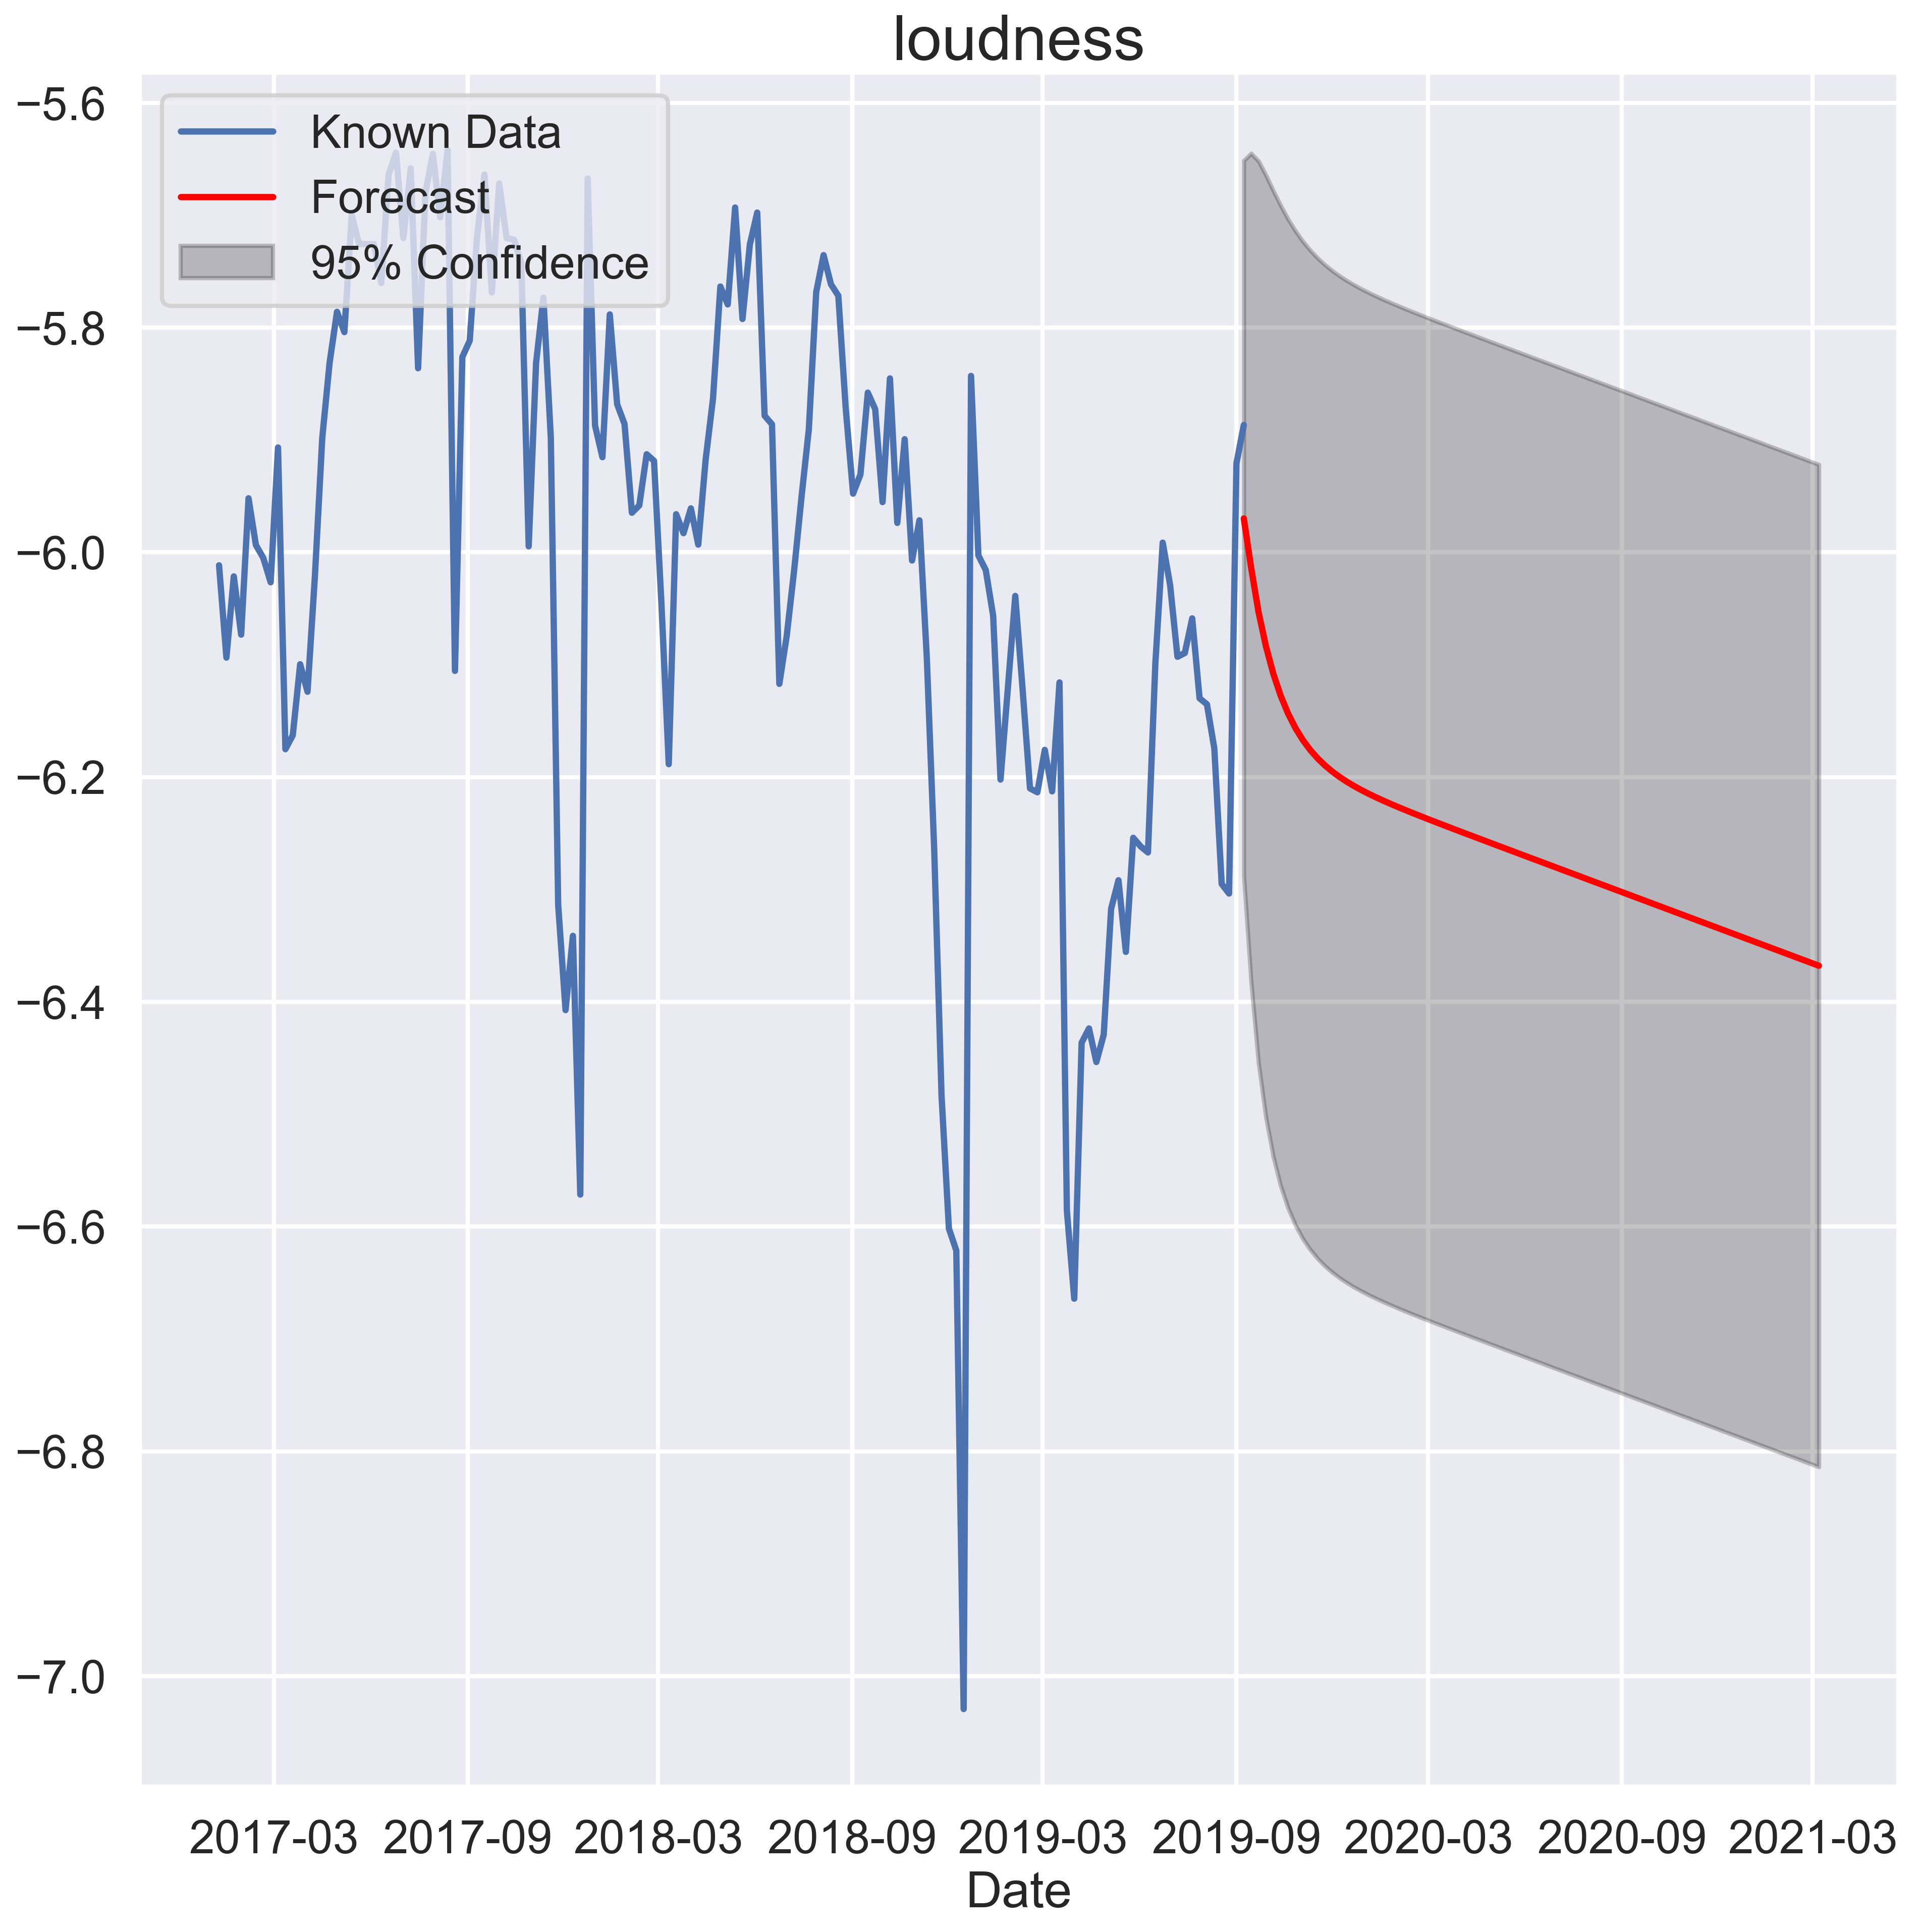

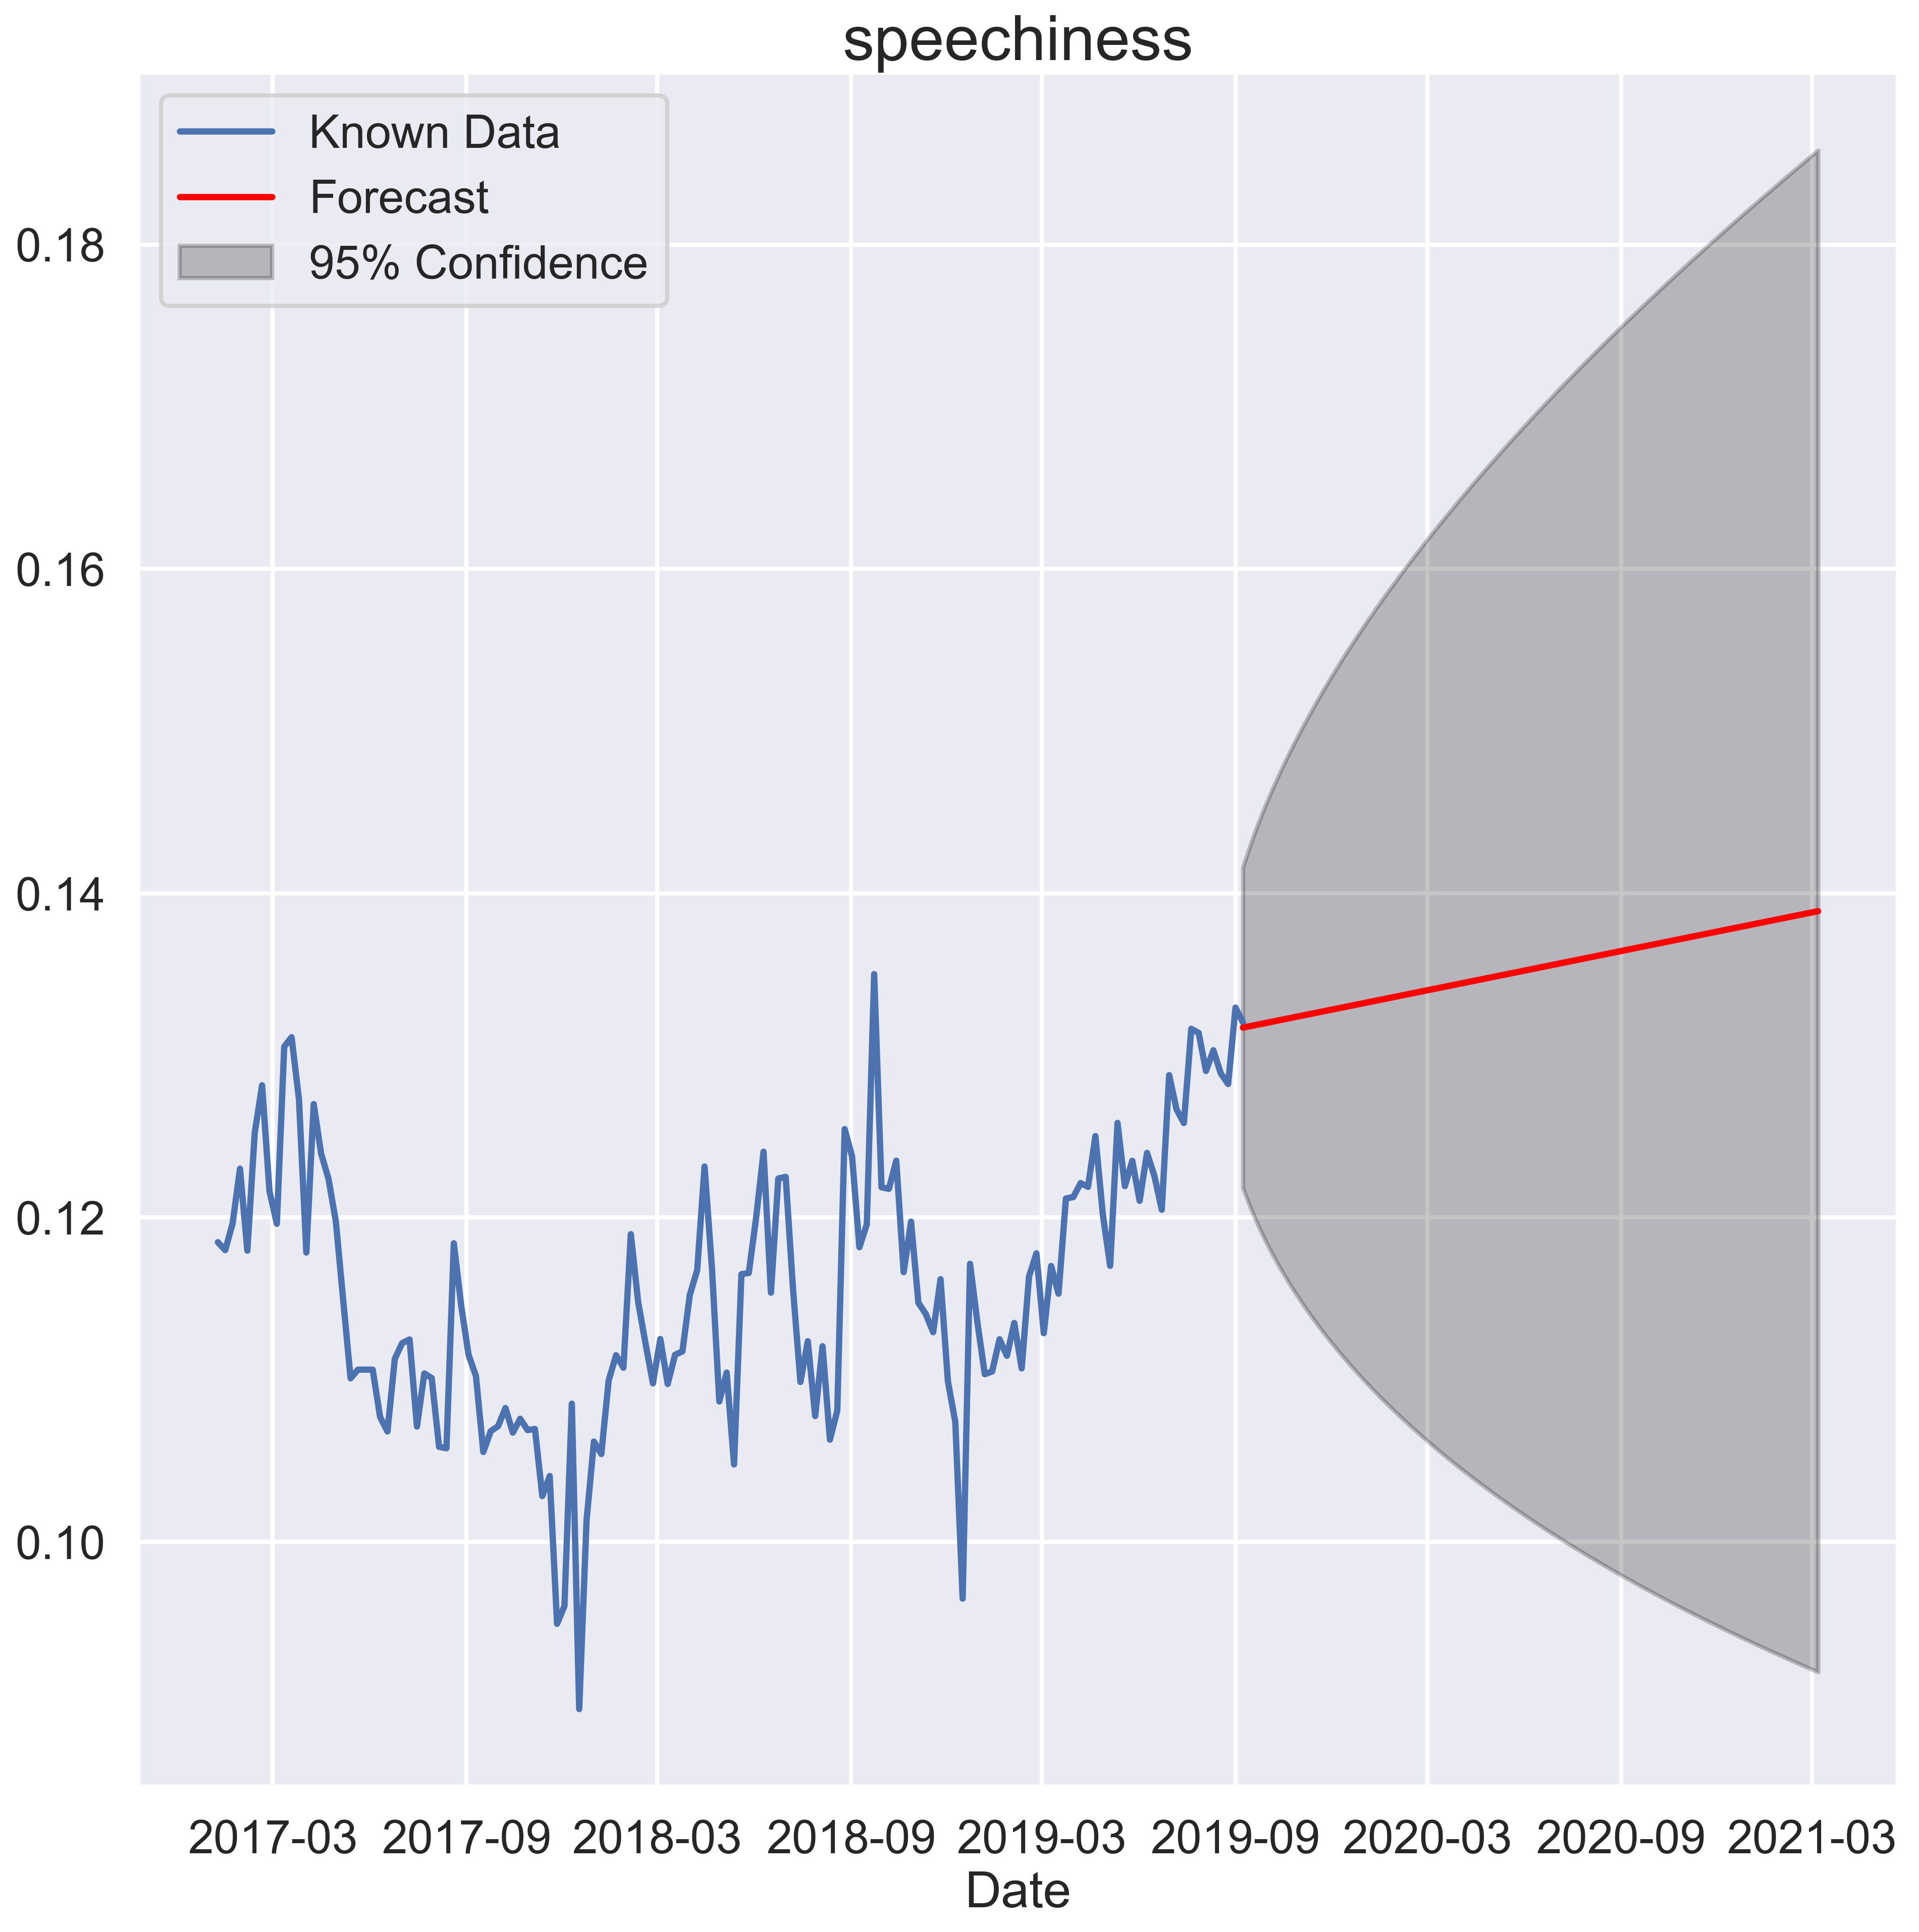

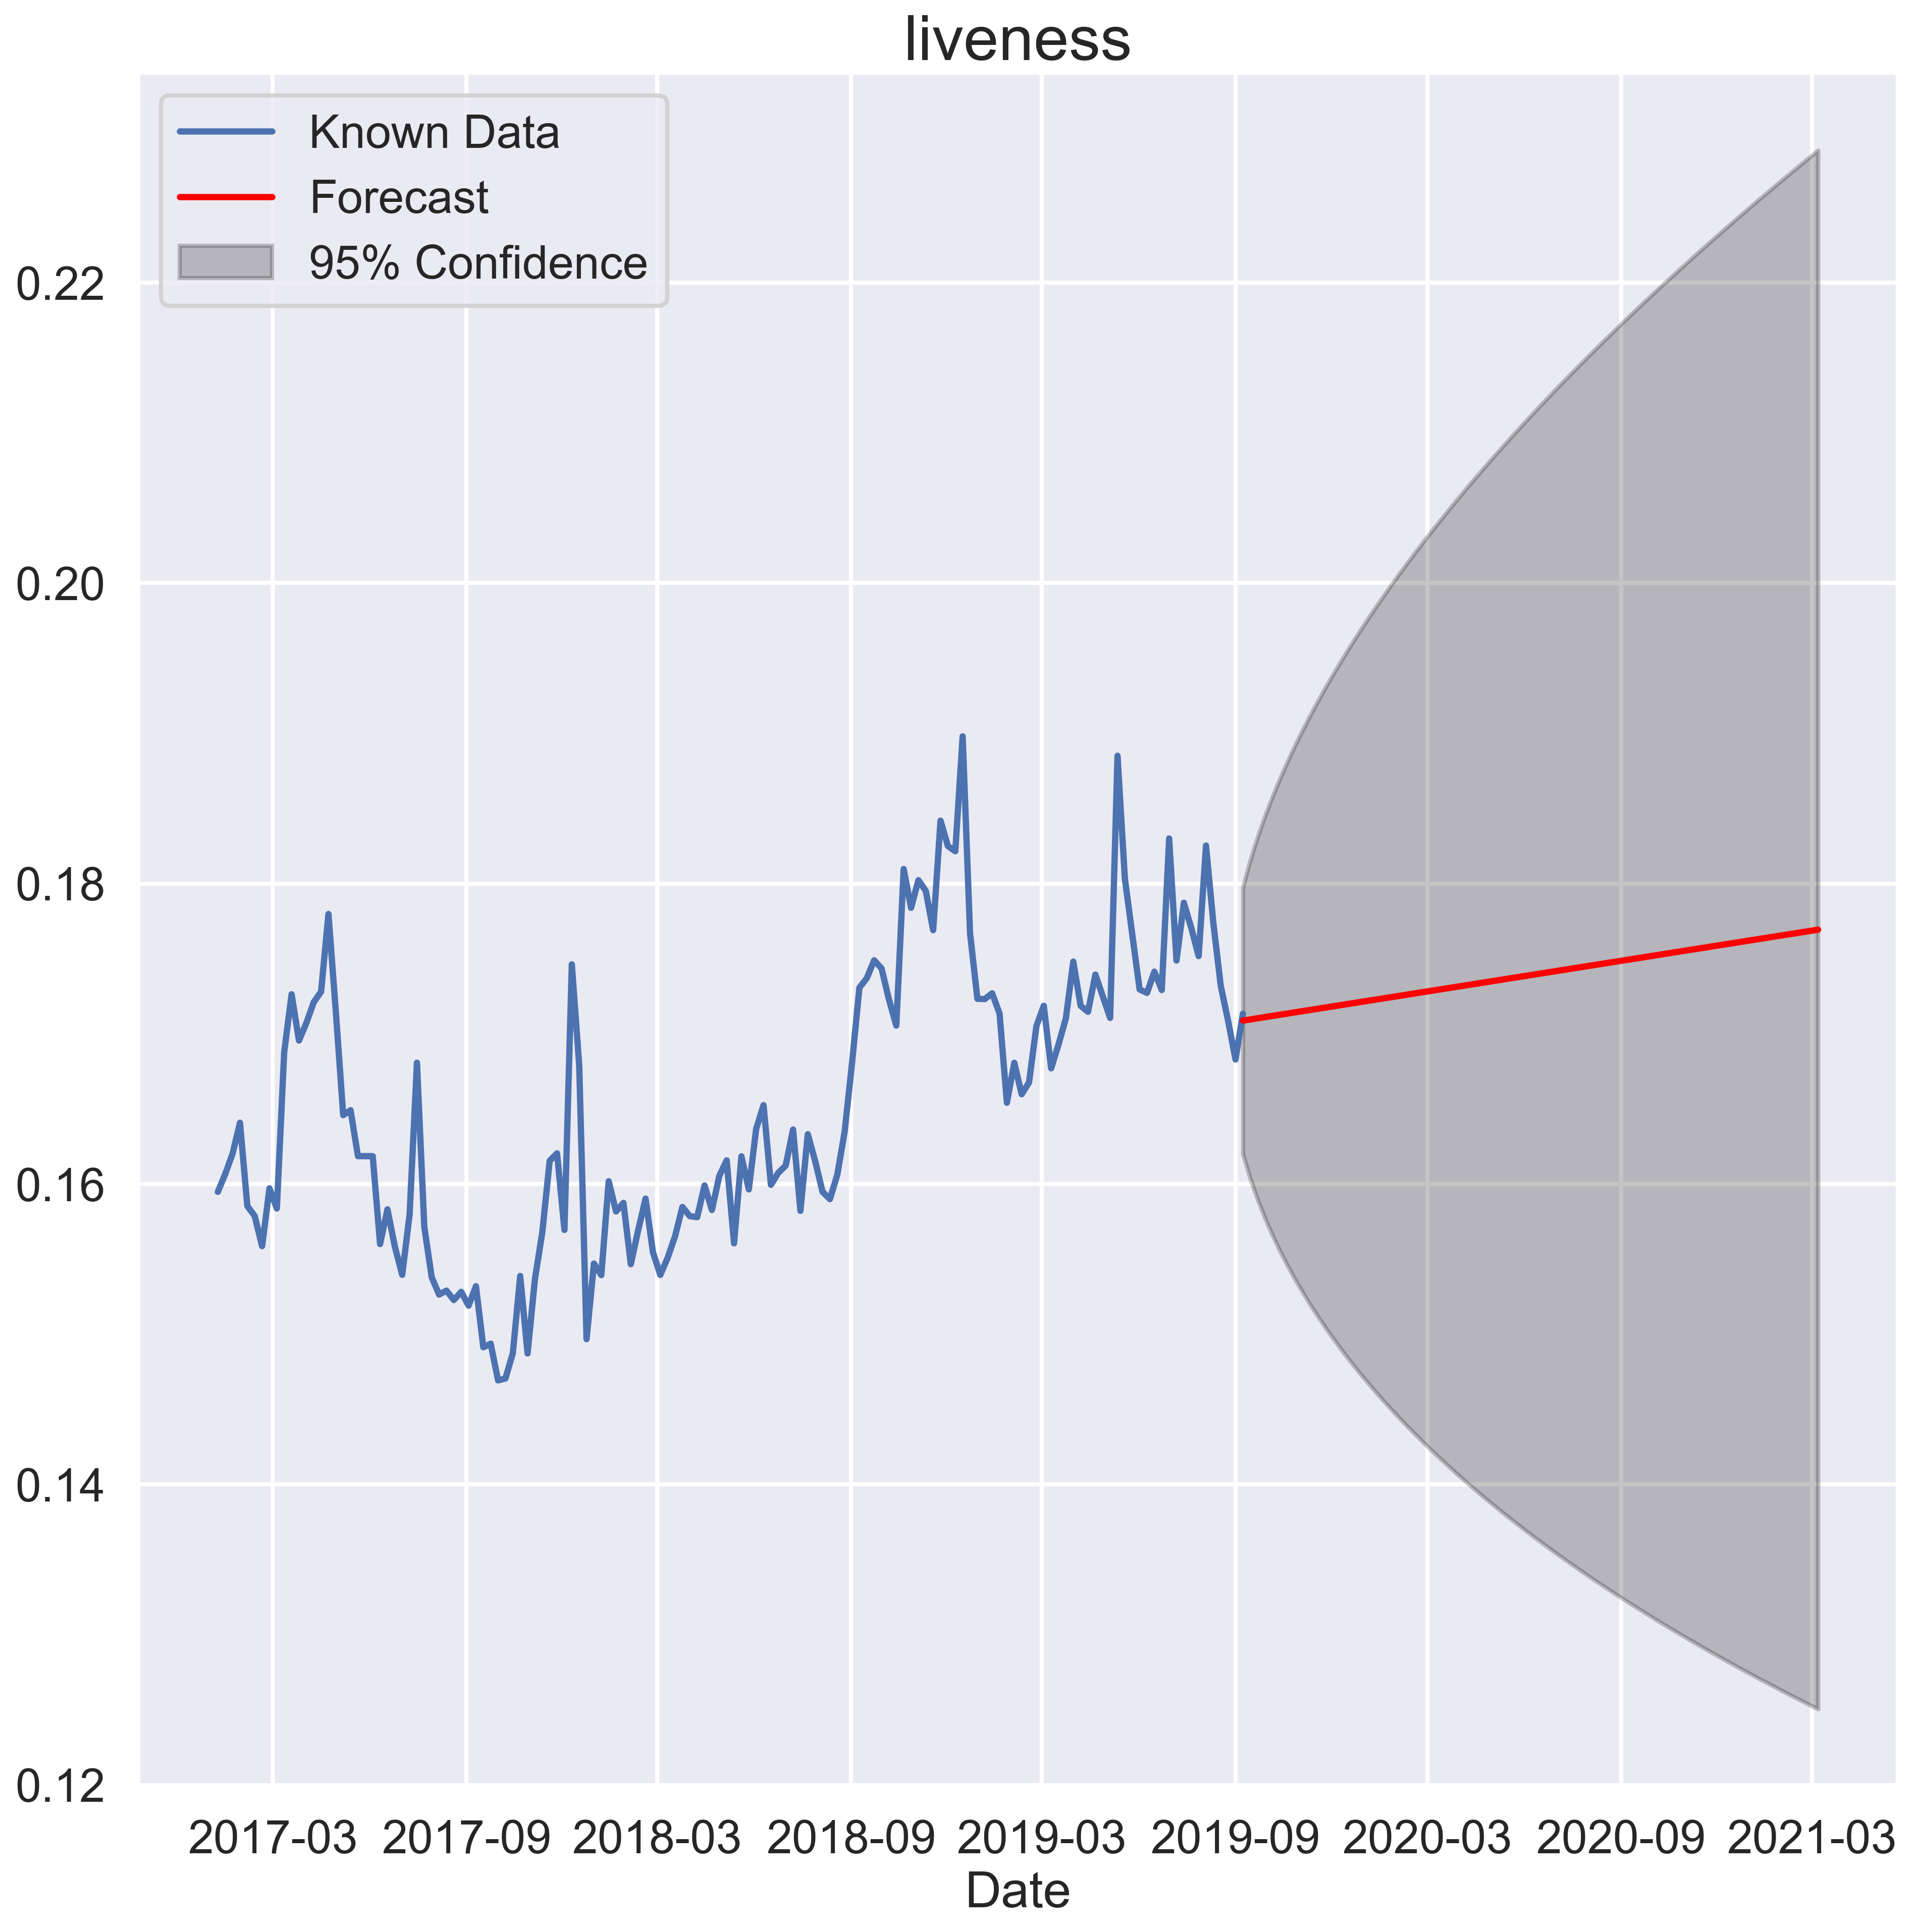

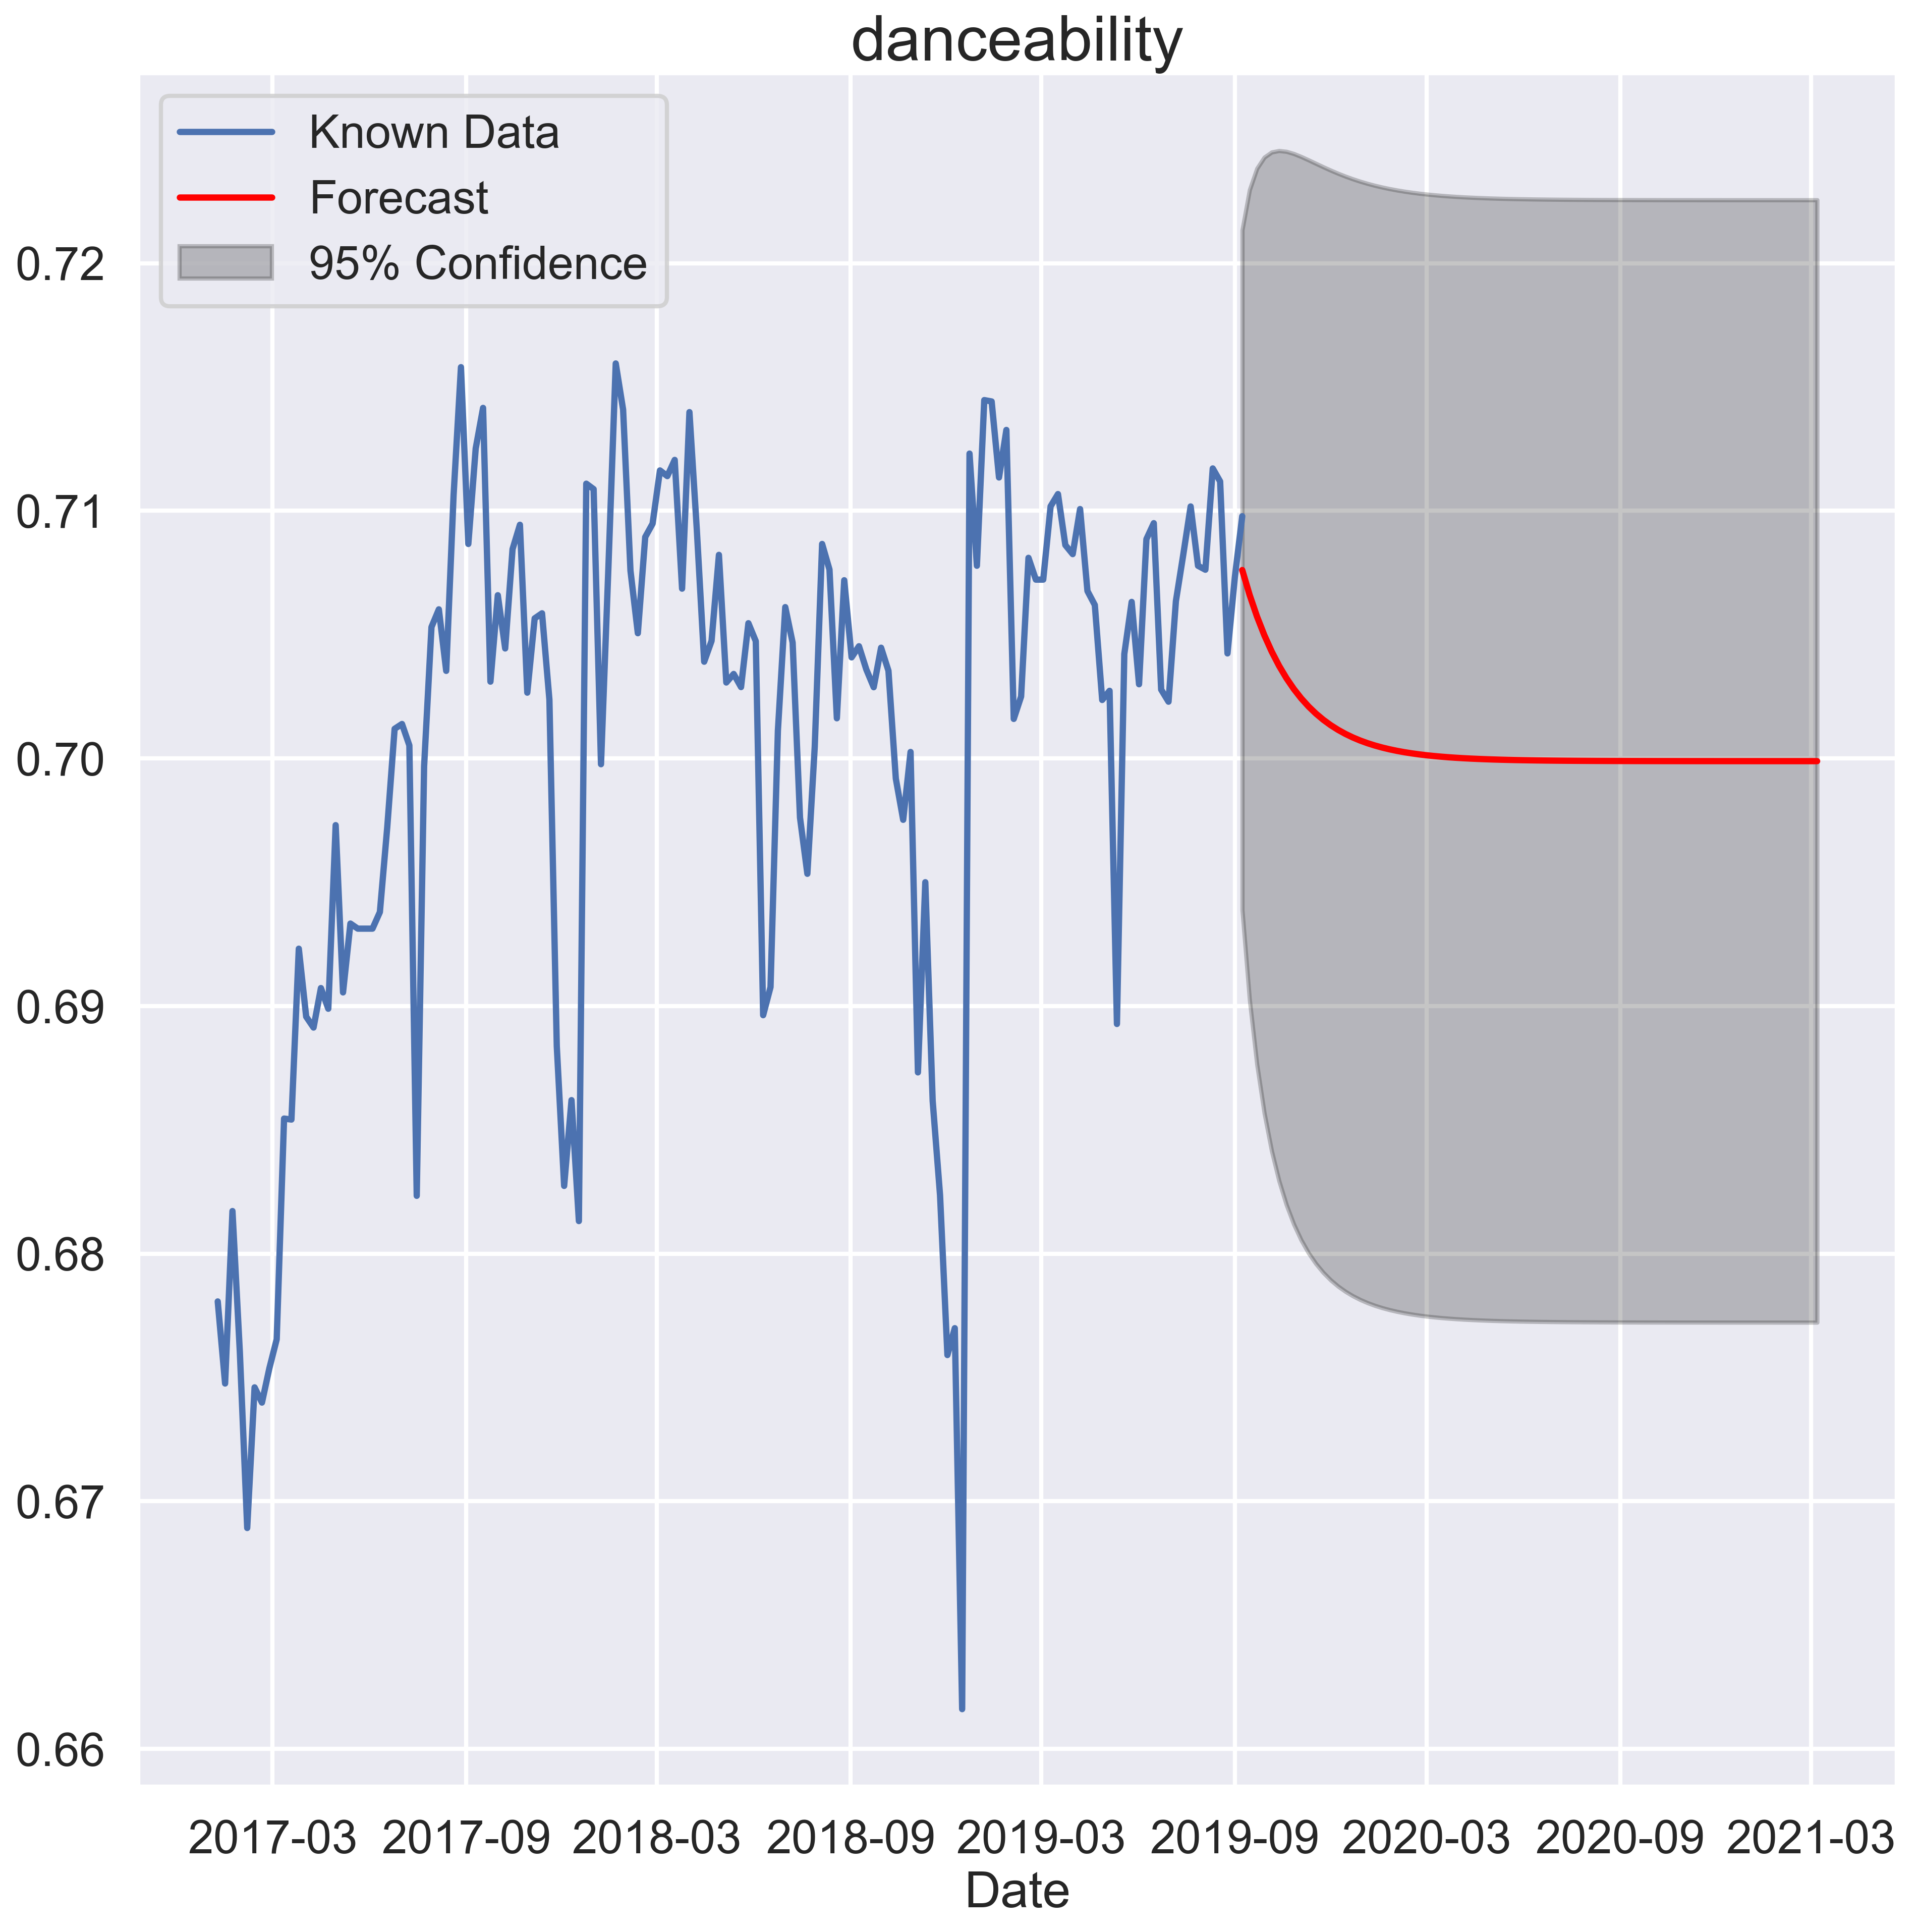

In [217]:
for f in important:
    automodel = arimamodel(feature_mean[f])
    plotarima(79, feature_mean[f], automodel)